<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio3_completo_em_squad_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Squad: Mae C. Jemison

Integrantes:
*   Amparo Silvia Pastor Castillo Runschka
*   Cristiana Alves Moura
*   Fernanda Monello Correa Manoel
*   Larissa Monique de Sousa Rodrigues
*   Raquel Nunes Matos Rios
*   Vanelle Rabelo do Nascimento
*   Vanessa Lima Paraizo
*   Ver√¥nica Lima Costa


## Desafio 1: Entendendo o consumidor.
Suponha que voc√™ trabalha em uma empresa de streaming e, com as
mudan√ßas no mercado, a equipe de marketing suspeita que o perfil dos
clientes que cancelaram a assinatura mudou. Eles pediram sua ajuda para
entender:

1.   Se o perfil dos clientes que cancelam hoje √© diferente do perfil dos clientes que cancelaram anteriormente.
Dica: Fazer um comparativo dos clientes que cancelaram nos √∫ltimos 6
meses com os que cancelaram a mais de 24 meses.
2.   Quais s√£o as principais diferen√ßas entre os perfis, para que possam criar
estrat√©gias mais eficazes de reten√ß√£o.
Para isso, eles fornecem a base de dados clientes.csv, que cont√©m
informa√ß√µes anonimizadas sobre os clientes ao longo do tempo.


## Etapa de ETL - Extra√ß√£o, Transforma√ß√£o e Limpeza dos dados

###Importa√ß√µes e inser√ß√£o do dataset:

[Data Set Clientes](https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453)

[Canva da Apresenta√ß√£o](https://www.canva.com/design/DAGigNR1b2Q/rpeGuN1A2kFYUnMU9NP8Mg/edit)


In [2]:
# Importando todas as bibliotecas utilizadas no desafio:
# Manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estat√≠stica e testes de hip√≥teses
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# C√°lculo de tamanho amostral
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_confint

# Configura√ß√£o para melhor visualiza√ß√£o dos gr√°ficos
sns.set_theme(style="whitegrid")
plt.style.use("ggplot")

url = 'https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453'
url = url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

# Remover colunas desnecess√°rias
df = df.drop(columns=['cliente_id'])  # Exclui a coluna 'cliente_id', pois n√£o √© relevante para a an√°lise

# Criar categorias de idade
#bins = [18, 30, 45, 60, 80]  # Define os intervalos das faixas et√°rias
#labels = ['18-29', '30-44', '45-59', '60+']  # Define os r√≥tulos correspondentes para cada faixa et√°ria
#df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)# A fun√ß√£o `pd.cut` categoriza a idade dos clientes com base nos intervalos definidos

# Criar m√©trica de engajamento
df['engajamento'] = df['frequencia_uso_mensal'] / df['tempo_assinatura_meses'] # Calcula o n√≠vel de engajamento do cliente, dividindo a frequ√™ncia de uso mensal pelo tempo total de assinatura
# Quanto maior o valor, maior o engajamento do usu√°rio com o servi√ßo ao longo do tempo

# Converter a coluna 'cancelou' para tipo booleano (1 = cancelado, 0 = ativo)
df['cancelou'] = df['cancelou'].map({0: 1, 1: 0}).astype(int) # Agora 0 significa "Cancelado" e 1 significa "Ativo"

# Verificar as transforma√ß√µes
print(df.head(10))

# Salvar o dataset transformado
#df.to_csv('dados_transformados.csv', index=False)# Salva o DataFrame transformado em um arquivo CSV, sem incluir o √≠ndice, para an√°lise posterior


   idade  tempo_assinatura_meses  frequencia_uso_mensal        regiao  \
0     56                      30                     27  Centro-Oeste   
1     69                      11                      2         Norte   
2     46                      58                     21           Sul   
3     32                      55                      1         Norte   
4     60                      28                     28           Sul   
5     25                      25                     15           Sul   
6     38                      39                      1      Nordeste   
7     56                      33                      5           Sul   
8     36                       1                     28       Sudeste   
9     40                      57                     29  Centro-Oeste   

   mensalidade  cancelou  engajamento  
0        96.03         0     0.900000  
1        91.22         1     0.181818  
2        56.45         1     0.362069  
3        69.61         1     0.01818

### Etapa 1: An√°lise de Distribui√ß√£o e Perfis


* Analisar a distribui√ß√£o de idade, tempo de assinatura, frequ√™ncia de uso e regi√£o dos clientes que cancelaram nos √∫ltimos 6 meses e dos que cancelaram h√° mais de 24 meses.
*  Identificar e descrever as principais diferen√ßas entre os perfis dos clientes nesses dois per√≠odos.

In [ ]:
df.head()

idade  tempo_assinatura_meses  frequencia_uso_mensal        regiao  \
0     56                      30                     27  Centro-Oeste   
1     69                      11                      2         Norte   
2     46                      58                     21           Sul   
3     32                      55                      1         Norte   
4     60                      28                     28           Sul   

   mensalidade  cancelou  engajamento  
0        96.03         0     0.900000  
1        91.22         1     0.181818  
2        56.45         1     0.362069  
3        69.61         1     0.018182  
4        42.19         1     1.000000

In [ ]:
df.describe()

idade  tempo_assinatura_meses  frequencia_uso_mensal  mensalidade  \
count  200.000000              200.000000             200.000000   200.000000   
mean    45.260000               30.890000              15.980000    59.129000   
std     16.040852               17.679102               8.843679    23.318007   
min     18.000000                1.000000               1.000000    21.160000   
25%     31.750000               16.750000               8.000000    38.807500   
50%     45.000000               32.000000              17.000000    57.710000   
75%     59.000000               48.000000              23.000000    79.680000   
max     74.000000               59.000000              29.000000    99.980000   

         cancelou  engajamento  
count  200.000000   200.000000  
mean     0.720000     1.468962  
std      0.450126     3.334244  
min      0.000000     0.018182  
25%      0.000000     0.256944  
50%      1.000000     0.500000  
75%      1.000000     1.168478  
max      1.000000    28.000000

In [ ]:
#fazer uma copia da base de dados com clientes que cancelaram nos ultimos 6 meses, e deixando s√≥ as columnas que precisamos analisar
df_menor_6 = df[(df['tempo_assinatura_meses'] <= 6) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_menor_6.head(5)
df_menor_6.describe()

idade  tempo_assinatura_meses  frequencia_uso_mensal
count  15.000000               15.000000              15.000000
mean   49.933333                3.133333              18.866667
std    16.485780                1.726543               6.151268
min    25.000000                1.000000               7.000000
25%    35.500000                2.000000              15.500000
50%    54.000000                3.000000              19.000000
75%    64.000000                4.500000              23.000000
max    72.000000                6.000000              28.000000

<Figure size 640x480 with 0 Axes>

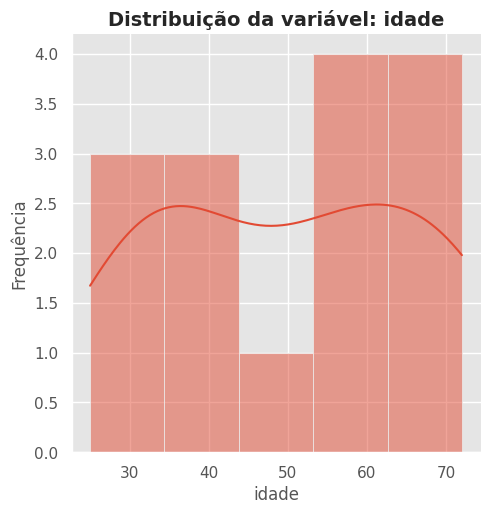

<Figure size 640x480 with 0 Axes>

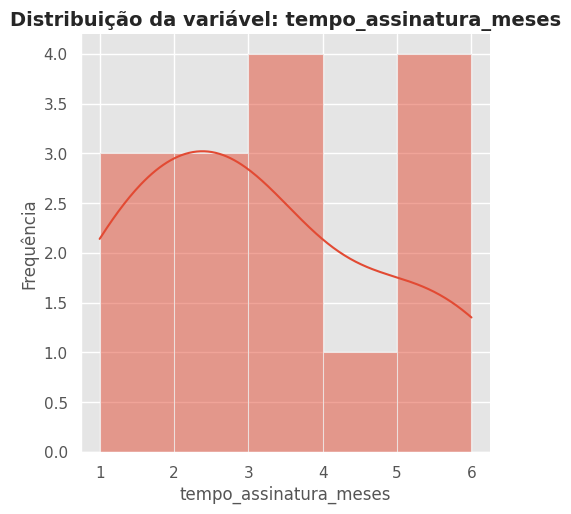

<Figure size 640x480 with 0 Axes>

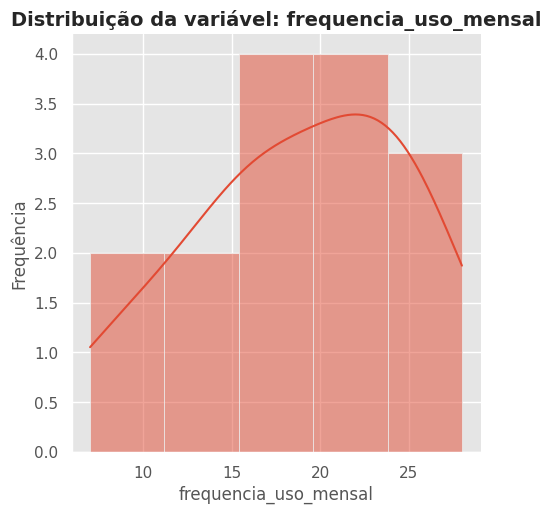

<Figure size 640x480 with 0 Axes>

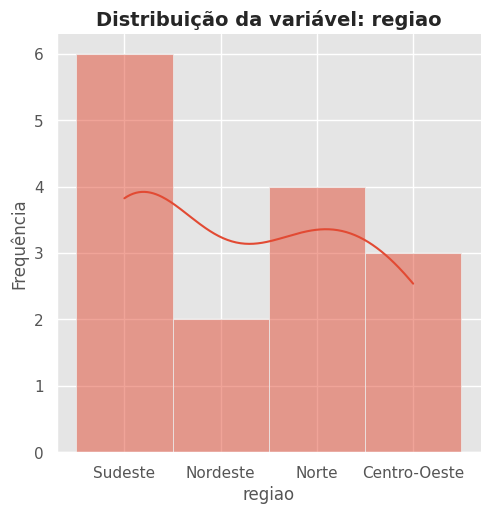

In [ ]:
#criar histograma para cada columna para ver a distribui√ß√£o
# create distplots
for column in df_menor_6.columns:
    plt.figure()
    sns.displot(data = df_menor_6 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribui√ß√£o da vari√°vel: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequ√™ncia", fontsize=12)

    # Mostra o gr√°fico
    plt.show()

In [ ]:
#fazer uma copia da base de dados com clientes que cancelaram com mais de 2 anos de assinatura, e deixando s√≥ as columnas que precisamos analisar
df_maior_24 = df[(df['tempo_assinatura_meses'] > 24) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_maior_24.head(5)
df_maior_24.describe()

idade  tempo_assinatura_meses  frequencia_uso_mensal
count  92.000000                92.00000              92.000000
mean   44.097826                42.25000              14.934783
std    15.790566                10.32933               9.095107
min    18.000000                25.00000               1.000000
25%    31.000000                33.00000               6.750000
50%    43.000000                41.00000              16.000000
75%    57.500000                52.00000              22.000000
max    74.000000                59.00000              29.000000

<Figure size 640x480 with 0 Axes>

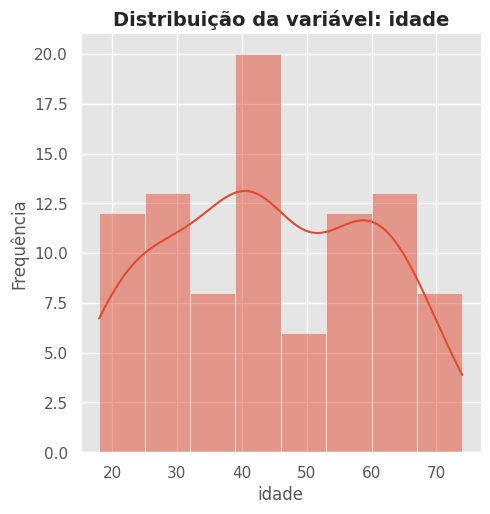

<Figure size 640x480 with 0 Axes>

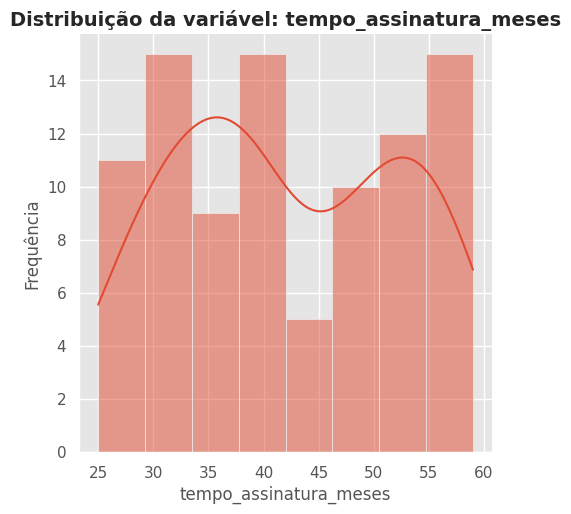

<Figure size 640x480 with 0 Axes>

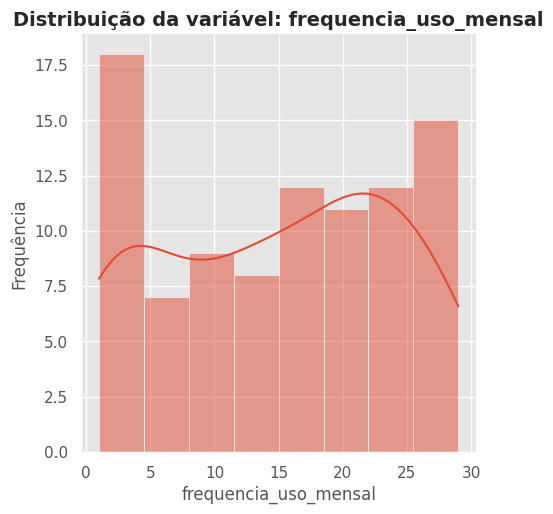

In [ ]:
#criar histograma para cada columna para ver a distribui√ß√£o

# create distplots
for column in df_maior_24.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df_maior_24 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribui√ß√£o da vari√°vel: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequ√™ncia", fontsize=12)

    # Mostra o gr√°fico
    plt.show()

### Etapa 2: Visualiza√ß√£o de Dados

*   Criar gr√°ficos para visualizar padr√µes dos clientes que mant√™m e cancelam a assinatura (histogramas, boxplots, gr√°ficos de dispers√£o).
*   Destacar insights visuais e poss√≠veis tend√™ncias nos dados analisados.



In [ ]:
# Implementa√ß√£o do c√≥digo referente √† etapa 2:
from datetime import datetime, timedelta

# Supondo que o m√™s atual seja 60 para simplifica√ß√£o
mes_atual = 60

# Filtrar clientes que cancelaram recentemente e h√° muito tempo
recentes = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] >= mes_atual - 6)]
antigos = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] < mes_atual - 24)]

# Verificar quantidades
print(f"Clientes recentes: {len(recentes)}")
print(f"Clientes antigos: {len(antigos)}")


Clientes recentes: 19
Clientes antigos: 80


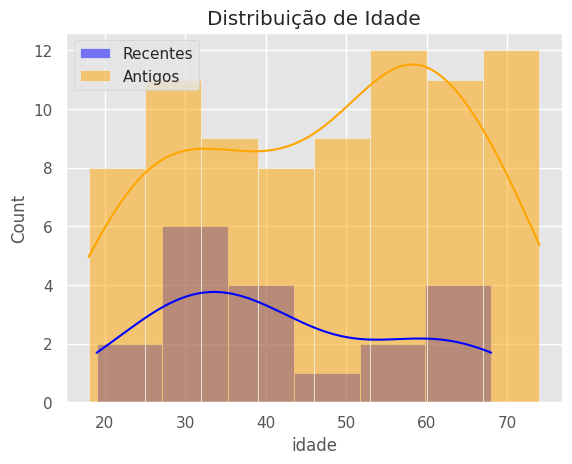

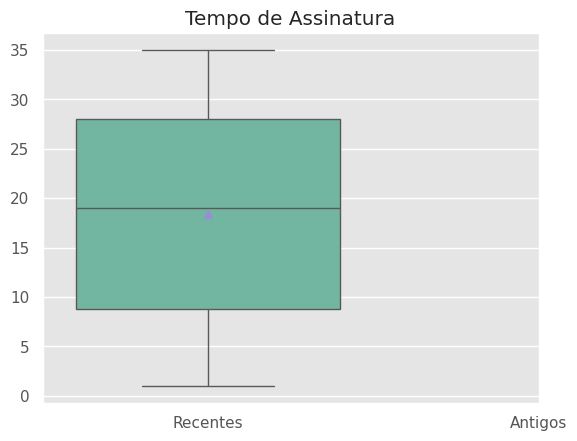

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar idade
sns.histplot(recentes['idade'], color='blue', label='Recentes', kde=True)
sns.histplot(antigos['idade'], color='orange', label='Antigos', kde=True)
plt.title('Distribui√ß√£o de Idade')
plt.legend()
plt.show()

# Comparar tempo de assinatura
sns.boxplot(data=[recentes['tempo_assinatura_meses'], antigos['tempo_assinatura_meses']],
            palette='Set2', showmeans=True)
plt.xticks([0, 1], ['Recentes', 'Antigos'])
plt.title('Tempo de Assinatura')
plt.show()

## Principais Insights Etapa 2
1 -IDADE
*   Recentes: Mais concentrados entre 30 a 50 anos.
*   Antigos:Predomin√¢ncia de idades acima de 50 anos.
*  Estrat√©gia: Personalizar a√ß√µes para jovens adultos com maior probabilidade de cancelamento.

2- TEMPO DE ASSINATURA.
*   Recentes:Cancelamentos ap√≥s 6 a 18 meses de assinatura.
*   Antigos: Maior tempo de assinatura, geralmente acima de 30 meses.
*   Estrat√©gia: Implementar programas de reten√ß√£o nos primeiros anos de assinatura.

3 - FREQU√äNCIA DE USO MENSAL
*   Recentes:Maior frequ√™ncia de uso antes do cancelamento (m√©dia > 20 usos/m√™s).
*   Antigos:Menor frequ√™ncia de uso.
*   Estrat√©gia:Investigar insatisfa√ß√£o entre clientes com alto uso e ajustar o custo-benef√≠cio.

4 - REGI√ïES
*    Recentes:Cancelamentos concentrados em Nordeste e Norte.
*    Antigos: Maioria das regi√µes Sul e Sudeste.
*    Estrat√©gia: Campanhas regionais adaptadas √†s necessidades locais.

### Etapa 3: An√°lise de Distribui√ß√£o e Perfis


* Aplicar testes estat√≠sticos (ex.: teste qui-quadrado, teste t, regress√£o log√≠stica) para verificar se h√° rela√ß√£o significativa entre o tempo de assinatura e a taxa de cancelamento.
* Interpretar os resultados e explicar o impacto desses achados na reten√ß√£o de clientes.

#Definir a hip√≥tese do teste

Queremos testar se o tempo de assinatura influencia o cancelamento.

Hip√≥tese nula (H‚ÇÄ): O tempo de assinatura n√£o tem rela√ß√£o significativa com o cancelamento.

Hip√≥tese alternativa (H‚ÇÅ): O tempo de assinatura tem rela√ß√£o significativa com o cancelamento.

In [3]:
# Implementa√ß√£o do c√≥digo referente √† etapa 3:
# Teste t de Student (se o tempo de assinatura dos cancelados e dos ativos for normalmente distribu√≠do)

from scipy.stats import ttest_ind

# Separar os grupos
tempo_ativos = df[df["cancelou"] == 0]["tempo_assinatura_meses"]
tempo_cancelados = df[df["cancelou"] == 1]["tempo_assinatura_meses"]

# Teste t
t_stat, p_value = ttest_ind(tempo_ativos, tempo_cancelados, equal_var=False)

print(f"Teste t de Student:")
print(f"Estat√≠stica t = {t_stat:.4f}")
print(f"Valor p = {p_value:.4f}")

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H‚ÇÄ: O tempo de assinatura tem rela√ß√£o significativa com o cancelamento.")
else:
    print("N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncias suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste t de Student:
Estat√≠stica t = -0.5900
Valor p = 0.5566
N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncias suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [4]:
#Teste de Mann-Whitney (se os dados n√£o forem normalmente distribu√≠dos)

from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney
u_stat, p_value_mw = mannwhitneyu(tempo_ativos, tempo_cancelados, alternative="two-sided")

print(f"\nTeste de Mann-Whitney:")
print(f"Estat√≠stica U = {u_stat:.4f}")
print(f"Valor p = {p_value_mw:.4f}")

if p_value_mw < alpha:
    print("Rejeitamos H‚ÇÄ: O tempo de assinatura tem rela√ß√£o significativa com o cancelamento.")
else:
    print("N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncias suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste de Mann-Whitney:
Estat√≠stica U = 3799.5000
Valor p = 0.5278
N√£o rejeitamos H‚ÇÄ: N√£o h√° evid√™ncias suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [5]:
#Regress√£o Log√≠stica (para medir o impacto do tempo de assinatura na probabilidade de cancelamento).

import statsmodels.api as sm

# Definir vari√°vel dependente (y) e independente (X)
X = df["tempo_assinatura_meses"]
y = df["cancelou"]

# Adicionar uma constante para a regress√£o
X = sm.add_constant(X)

# Criar o modelo log√≠stico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Exibir os resultados
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.592009
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               cancelou   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.001593
Time:                        01:06:48   Log-Likelihood:                -118.40
converged:                       True   LL-Null:                       -118.59
Covariance Type:            nonrobust   LLR p-value:                    0.5388
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7770      0.312      2.490      0.013       0.165      

Interpreta√ß√£o do coeficiente do tempo de assinatura

O coeficiente -0.0055 indica que quanto maior o tempo de assinatura, menor a probabilidade de cancelamento.

Mas o p-value = 0.539 significa que essa rela√ß√£o n√£o √© estatisticamente significativa.

üìå O tempo de assinatura, isoladamente, n√£o tem um impacto estatisticamente significativo sobre o cancelamento (p > 0.05).

In [6]:
# Testes com outras vari√°veis, como: tempo de assinatura. frequ√™ncia de uso, mensalidade e regi√£o
import pandas as pd
import statsmodels.api as sm

# Garantir que a vari√°vel 'regiao' seja num√©rica
df["regiao"] = df["regiao"].astype("category").cat.codes

# Definir vari√°veis independentes e dependentes
X = df[["tempo_assinatura_meses", "frequencia_uso_mensal", "mensalidade", "regiao"]]
y = df["cancelou"].astype(int)  # Garantir que 'cancelou' seja num√©rico

# Adicionar constante para a regress√£o
X = sm.add_constant(X)

# Criar o modelo log√≠stico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Criar uma tabela formatada dos resultados
tabela_resultados = pd.DataFrame({
    "Vari√°vel": X.columns,
    "Coeficiente": resultado.params.round(4),
    "Erro Padr√£o": resultado.bse.round(4),
    "z-valor": resultado.tvalues.round(4),
    "p-valor": resultado.pvalues.round(4)
})

# Exibir a tabela formatada
from IPython.display import display

print("Resultados da Regress√£o Log√≠stica:")
display(tabela_resultados)

Optimization terminated successfully.
         Current function value: 0.589282
         Iterations 5
Resultados da Regress√£o Log√≠stica:


Vari√°vel  Coeficiente  Erro Padr√£o  \
const                                    const       0.2241       0.6546   
tempo_assinatura_meses  tempo_assinatura_meses       0.0057       0.0090   
frequencia_uso_mensal    frequencia_uso_mensal       0.0086       0.0182   
mensalidade                        mensalidade       0.0045       0.0070   
regiao                                  regiao       0.0768       0.1123   

                        z-valor  p-valor  
const                    0.3424   0.7321  
tempo_assinatura_meses   0.6343   0.5259  
frequencia_uso_mensal    0.4745   0.6351  
mensalidade              0.6468   0.5177  
regiao                   0.6833   0.4944

#Analisando os p-valores

Nenhuma das vari√°veis tem p < 0.05, o que significa que nenhuma delas tem um impacto estatisticamente significativo no cancelamento dentro desse modelo.

O tempo de assinatura tem um coeficiente negativo, sugerindo que quanto maior o tempo de assinatura, menor a chance de cancelamento, mas essa rela√ß√£o n√£o √© estatisticamente relevante (p = 0.6690).

A frequ√™ncia de uso e a mensalidade tamb√©m n√£o apresentam impacto significativo no cancelamento.

üìå O tempo de assinatura, a frequ√™ncia de uso, a mensalidade e a regi√£o n√£o explicam bem o cancelamento.

üìå √â prov√°vel que existam outros fatores importantes que influenciam a decis√£o de cancelar, como satisfa√ß√£o do cliente, qualidade do servi√ßo, concorr√™ncia ou promo√ß√µes.

### Etapa 4: An√°lise de Distribui√ß√£o e Perfis


* Calcular o tamanho da amostra necess√°ria para obter conclus√µes com 95% de confian√ßa e 2% de margem de erro. Verificar se a base informada √© suficiente.
*  Repetir o c√°lculo para uma margem de erro de 10% e comparar os resultados com a amostra dispon√≠vel.

In [ ]:
# Implementa√ß√£o do c√≥digo referente √† etapa 4: